In [38]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
import seaborn as sn
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc

In [39]:

df = pd.read_csv('/content/drive/MyDrive/fraudTrain.csv')


In [40]:
df.head(n=10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
5,5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,...,40.3750,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0
6,6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,...,37.9931,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0
7,7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,...,38.8432,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0
8,8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,...,40.3359,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0
9,9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,...,36.5220,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [42]:
df.shape

(1296675, 23)

In [43]:
# finding number of null values
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [44]:
#finding if any duplicate values are present
df.duplicated().sum()

0

In [45]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [46]:
df.drop('Unnamed: 0',axis=1	)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [47]:
obJList=df.select_dtypes(include="object").columns

label_encoder=LabelEncoder()

for i in obJList:
    df[i]=label_encoder.fit_transform(df[i].astype(str))



In [48]:
is_fraud=df[df['is_fraud']==1]
print("fraudulent transactions prcentage : {}".format((is_fraud.shape[0]/df.shape[0])*100))
is_fraud.amt.describe()

fraudulent transactions prcentage : 0.5788651743883394


count    7506.000000
mean      531.320092
std       390.560070
min         1.060000
25%       245.662500
50%       396.505000
75%       900.875000
max      1376.040000
Name: amt, dtype: float64

In [49]:
not_fraud=df[df['is_fraud']==0]
print("non fraudulent transactions prcentage : {}".format((not_fraud.shape[0]/df.shape[0])*100))
not_fraud.amt.describe()

non fraudulent transactions prcentage : 99.42113482561166


count    1.289169e+06
mean     6.766711e+01
std      1.540080e+02
min      1.000000e+00
25%      9.610000e+00
50%      4.728000e+01
75%      8.254000e+01
max      2.894890e+04
Name: amt, dtype: float64

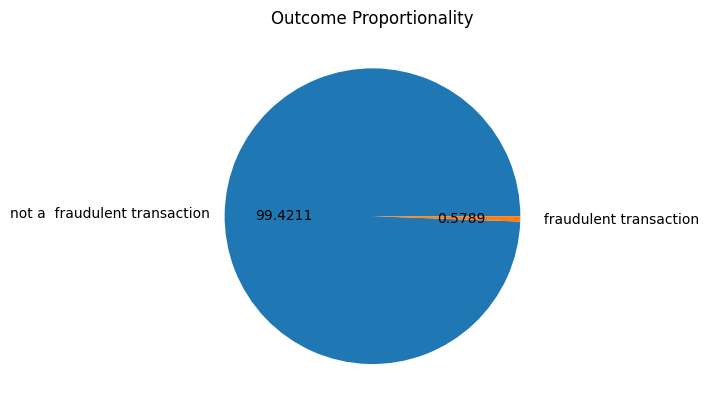

In [50]:
plt.pie(df.is_fraud.value_counts(),
		labels= ['not a  fraudulent transaction', '  fraudulent transaction'],
		autopct='%.4f', shadow=False)
plt.title('Outcome Proportionality')
plt.show()


In [51]:

majority_class = df[df['is_fraud'] == 0]
minority_class = df[df['is_fraud'] == 1]
oversampled_minority = minority_class.sample(n=100000, replace=True, random_state=42)
oversampled_df = pd.concat([df, oversampled_minority], axis=0)
oversampled_df = oversampled_df.sample(frac=1, random_state=42).reset_index(drop=True)
print(oversampled_df)


         Unnamed: 0  trans_date_trans_time            cc_num  merchant  \
0            277829                 274004     4988304376504       364   
1            429844                 423324   180014262259255       148   
2            396546                 390612     4538566639857       224   
3           1083569                1065068  3527536963490470       415   
4            325722                 321002   343746486082492       345   
...             ...                    ...               ...       ...   
1396670      110268                 108905  6528911529051375       590   
1396671      259178                 255618   377895991033232       191   
1396672      131932                 130253  3583293909206278       680   
1396673      671155                 660587    30143713661454       409   
1396674      121958                 120444    38530489946071        11   

         category     amt  first  last  gender  street  ...      lat  \
0               6   57.02    348   424 

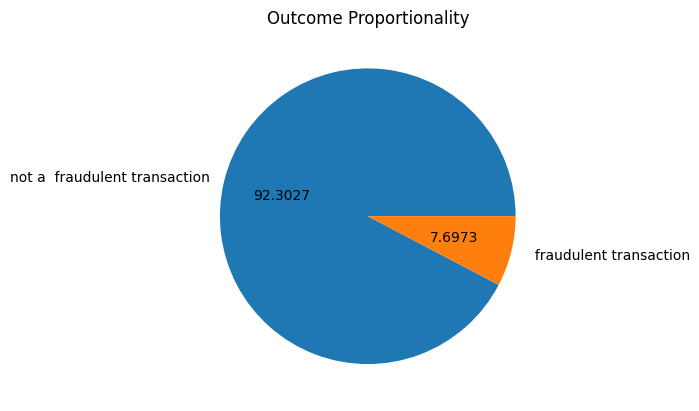

In [52]:
plt.pie(oversampled_df.is_fraud.value_counts(),
		labels= ['not a  fraudulent transaction', '  fraudulent transaction'],
		autopct='%.4f', shadow=False)
plt.title('Outcome Proportionality')
plt.show()

In [53]:
oversampled_df.drop('Unnamed: 0',axis=1	)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,274004,4988304376504,364,6,57.02,348,424,1,967,698,...,41.4575,-74.1659,2258,55,57,375435,1337281386,41.081765,-74.236306,0
1,423324,180014262259255,148,6,9.38,48,325,0,4,91,...,31.5710,-86.2743,2566,186,244,204929,1342050559,32.508257,-85.833056,0
2,390612,4538566639857,224,12,1.39,164,224,1,364,257,...,40.8170,-74.0000,13835,366,406,17831,1341030279,41.298897,-74.054828,0
3,1065068,3527536963490470,415,4,82.87,323,409,0,285,107,...,32.9413,-81.1807,1725,424,548,1034284,1364264444,33.788187,-80.742020,0
4,321002,343746486082492,345,4,81.85,160,302,1,828,132,...,44.8605,-85.8138,3096,423,564,1260779,1338808626,45.676772,-85.108326,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1396670,108905,6528911529051375,590,2,72.38,105,404,0,190,886,...,45.8327,-91.0144,1478,310,366,1149562,1330829368,45.043710,-90.231846,0
1396671,255618,377895991033232,191,9,2.33,203,305,0,684,345,...,41.4682,-72.5751,5438,270,358,870120,1336546444,40.711495,-71.670634,0
1396672,130253,3583293909206278,680,6,118.27,97,127,0,186,413,...,35.0203,-106.5503,310,439,611,575911,1331675187,34.849069,-106.219762,0
1396673,660587,30143713661454,409,12,5.60,257,425,1,529,318,...,48.6669,-96.5969,140,149,86,59293,1350120506,47.807830,-97.498754,0


In [54]:
is_fraud=oversampled_df[oversampled_df['is_fraud']==1]
print("fraudulent transactions prcentage : {}".format((is_fraud.shape[0]/oversampled_df.shape[0])*100))
is_fraud.amt.describe()

fraudulent transactions prcentage : 7.69728104247588


count    107506.000000
mean        531.783724
std         390.528099
min           1.060000
25%         245.730000
50%         407.080000
75%         900.800000
max        1376.040000
Name: amt, dtype: float64

In [55]:
not_fraud=oversampled_df[oversampled_df['is_fraud']==0]
print("not fraudulent transactions prcentage : {}".format((not_fraud.shape[0]/oversampled_df.shape[0])*100))
not_fraud.amt.describe()

not fraudulent transactions prcentage : 92.30271895752412


count    1.289169e+06
mean     6.766711e+01
std      1.540080e+02
min      1.000000e+00
25%      9.610000e+00
50%      4.728000e+01
75%      8.254000e+01
max      2.894890e+04
Name: amt, dtype: float64

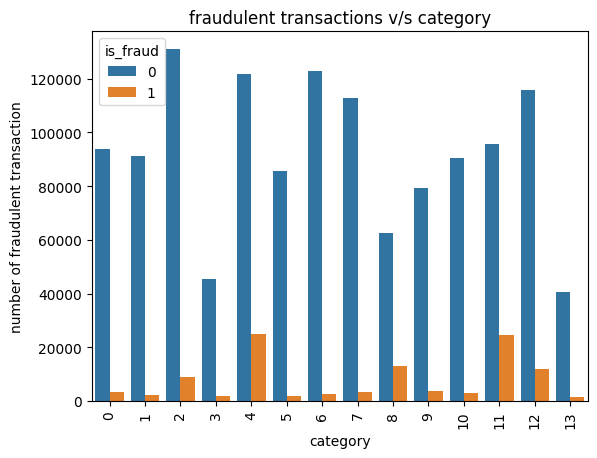

In [56]:
sorted_cities = oversampled_df['city'].value_counts().sort_index().index
sn.countplot(x='category',hue='is_fraud',data=oversampled_df)
plt.xticks(rotation=90)
plt.title("fraudulent transactions v/s category")
plt.xlabel('category')
plt.ylabel('number of fraudulent transaction')
plt.show()

In [57]:
X=oversampled_df.drop('is_fraud',axis=1)
Y=oversampled_df['is_fraud']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [58]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [59]:
lr=LogisticRegression(max_iter=1000)
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))
precision = precision_score(y_test, y_pred_lr)
print(f"Model precision: {precision:.4f}")
recall = recall_score(y_test, y_pred_lr)
print(f"Model recall: {recall:.4f}")

Model Accuracy: 0.9565

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98    258120
           1       0.88      0.49      0.63     21215

    accuracy                           0.96    279335
   macro avg       0.92      0.74      0.81    279335
weighted avg       0.95      0.96      0.95    279335


Confusion Matrix:
[[256678   1442]
 [ 10719  10496]]
Model precision: 0.8792
Model recall: 0.4947


In [64]:
f1 = f1_score(y_test, y_pred_lr)
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.6332


In [60]:

clf = DecisionTreeClassifier(random_state=42)
clf.fit(x_train, y_train)
y_pred_dt = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
precision = precision_score(y_test, y_pred_dt)
print(f"Model precision: {precision:.2f}")
recall = recall_score(y_test, y_pred_dt)
print(f"Model recall: {recall:.2f}")


Model Accuracy: 0.9982

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    258120
           1       0.98      1.00      0.99     21215

    accuracy                           1.00    279335
   macro avg       0.99      1.00      0.99    279335
weighted avg       1.00      1.00      1.00    279335


Confusion Matrix:
[[257608    512]
 [     0  21215]]
Model precision: 0.98
Model recall: 1.00


In [65]:
f1 = f1_score(y_test, y_pred_dt)
print(f"F1 Score: {f1:.4f}")


F1 Score: 0.9881


In [61]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train, y_train)
y_pred_rt = rf_classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_rt)
precision = precision_score(y_test, y_pred_rt)
recall = recall_score(y_test, y_pred_rt)
f1 = f1_score(y_test, y_pred_rt)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.9996
Precision: 0.9942
Recall: 1.0000
F1 Score: 0.9971


In [66]:
# Replace these values with your actual precision, recall, and F1 scores
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']
precision_scores = [0.88, 0.98, 0.99]
recall_scores = [0.49, 1.00, 1.00]
f1_scores = [0.63, 0.99, 0.99]


                 Model  Precision  Recall  F1 Score
0  Logistic Regression       0.88    0.49      0.63
1        Decision Tree       0.98    1.00      0.99
2        Random Forest       0.99    1.00      0.99


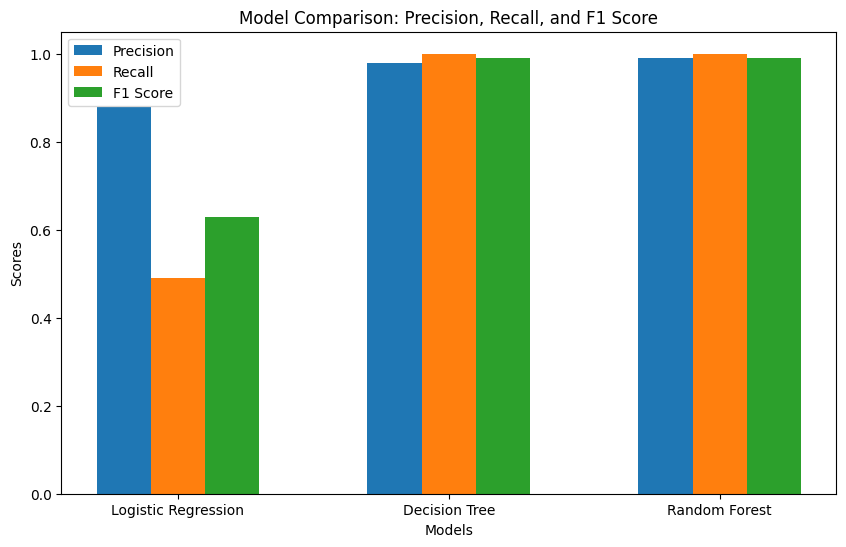

In [69]:


# Create a DataFrame
results_df = pd.DataFrame({
    'Model': model_names,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores
})

# Print the DataFrame
print(results_df)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Bar positions
bar_width = 0.2
index = np.arange(len(model_names))

# Bar plots
bars1 = ax.bar(index - bar_width, precision_scores, bar_width, label='Precision')
bars2 = ax.bar(index, recall_scores, bar_width, label='Recall')
bars3 = ax.bar(index + bar_width, f1_scores, bar_width, label='F1 Score')

# Add labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Comparison: Precision, Recall, and F1 Score')
ax.set_xticks(index)
ax.set_xticklabels(model_names)
ax.legend()

# Show plot
plt.show()
